In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [3]:
data = pd.read_csv(r"C:\Users\ravis\Downloads\creditcard.csv")  


## EDA

In [6]:
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


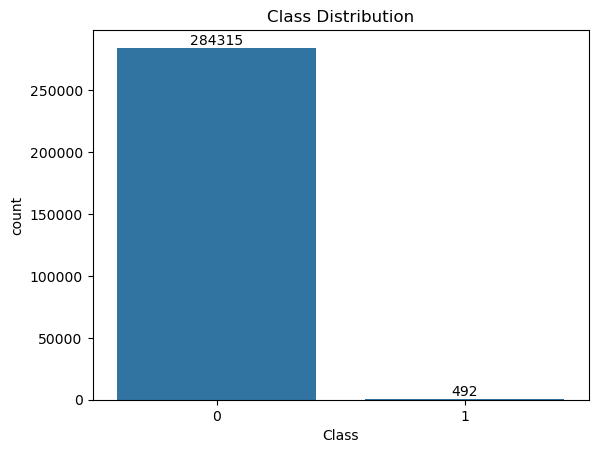

In [14]:
ax = sns.countplot(x='Class', data=data)
ax.bar_label(ax.containers[0]) 
plt.title('Class Distribution')
plt.show()


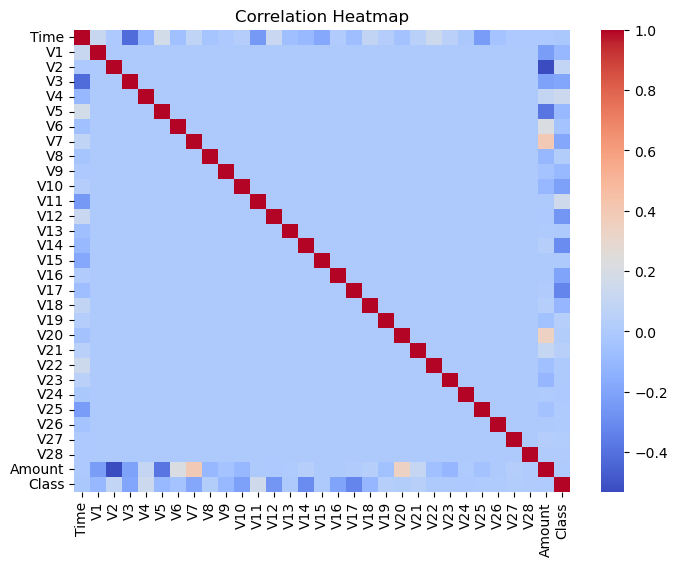

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

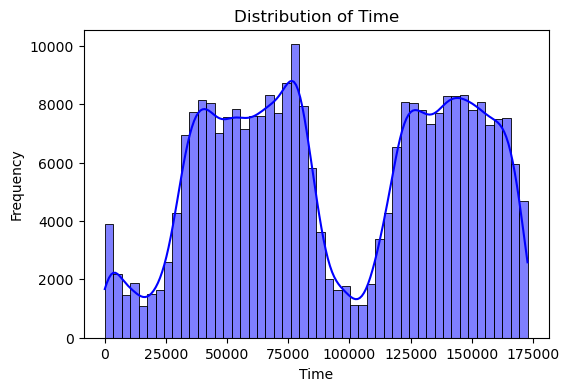

In [25]:
plt.figure(figsize=(6, 4))
sns.histplot(data['Time'], bins=50, kde=True, color='blue')
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

In [27]:
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])
data.drop('Time', axis=1, inplace=True)  # Drop Time if it has no significance


In [29]:
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [31]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)


In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)


In [35]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)


C:\Users\ravis\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:00:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [37]:
def evaluate_model(y_test, y_pred):
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))

print("Logistic Regression:")
evaluate_model(y_test, y_pred_log)

print("\nRandom Forest:")
evaluate_model(y_test, y_pred_rf)

print("\nXGBoost:")
evaluate_model(y_test, y_pred_xgb)


Logistic Regression:
Accuracy: 0.9991573329588147
Precision: 0.8289473684210527
Recall: 0.6428571428571429
F1 Score: 0.7241379310344828

Random Forest:
Accuracy: 0.9996137776061234
Precision: 0.9418604651162791
Recall: 0.826530612244898
F1 Score: 0.8804347826086957

XGBoost:
Accuracy: 0.9995259997893332
Precision: 0.8901098901098901
Recall: 0.826530612244898
F1 Score: 0.8571428571428571


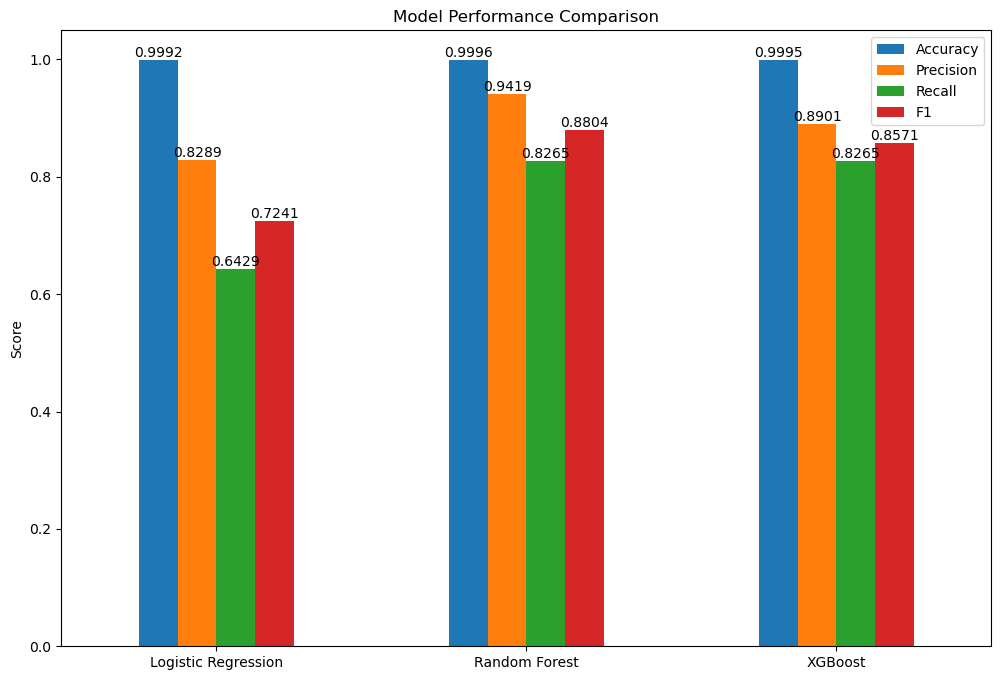

In [59]:
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
metrics = [accuracy_score, precision_score, recall_score, f1_score]

results = []
for y_pred in [y_pred_log, y_pred_rf, y_pred_xgb]:
    results.append([metric(y_test, y_pred) for metric in metrics])

results_df = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=models)
ax = results_df.plot(kind='bar', figsize=(12, 8), rot=0)
plt.title('Model Performance Comparison')
plt.ylabel('Score')

# Add value labels
for container in ax.containers:
    ax.bar_label(container,fmt='%.4f')

plt.show()
